In [35]:
!pip install bayesian-optimization

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from bayes_opt import BayesianOptimization

%matplotlib inline
sns.set()

In [37]:
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [38]:
cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [39]:
df = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns',275)
df.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Quality_of_Life,Satisfied_With_Life_1,Satisfied_With_Life_2,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Satisfaction_Score,Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet

In [40]:
y = df['Quality_of_Life']
x = df.drop(['Survey_ID','Satisfaction_Score', 'Quality_of_Life'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
from IPython.display import Audio
sound_file = 'http://www.soundjay.com/button/beep-07.wav'
Audio(sound_file, autoplay=True)

In [44]:
from sklearn import metrics
param_grid = {
    'learning_rate': [0.1, 0.25, 0.5, 0.75],
    'n_estimators': np.arange(10,70,20),
    'max_depth': np.arange(5,115,20),
    'min_samples_split': np.arange(2,127,25)}
def gb_fit(learning_rate, n_estimators, max_depth, min_samples_split):
    gb = GradientBoostingClassifier(
        learning_rate = float(learning_rate), 
        n_estimators = int(n_estimators), 
        max_depth = int(max_depth),
        min_samples_split = int(min_samples_split),
        random_state=42, 
        verbose=1)
    train_gb = gb.fit(x_train,y_train)
    y_pred = train_gb.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    return rmse

In [45]:
gbBO = BayesianOptimization(gb_fit, {
    'learning_rate': (0.1, 0.75),
    'n_estimators': (10,70),
    'max_depth': (5,105),
    'min_samples_split': (2,102)})
gbBO.maximize(n_iter=12, init_points=4)

|   iter    |  target   | learni... | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------------------
      Iter       Train Loss   Remaining Time 
         1        3614.0562           25.97s
         2 103093614954.2000           34.60s
         3 78308795624084705707410910070732821630678638882225411049667818267034555747347577855104124171081130394321447562020939753819471872.0000           36.63s
         4 78308795672203126363911935273148708456413275508125313237892941322667083597794685910098898995258274225723698714679220885828665344.0000           36.84s
         5 78308795672203126363911935273148708456413275508125313237892941322667083597794685910098898995258274225723698714679220885828665344.0000           35.96s
         6 78308795672203126363911935273148708456413275508125313237892941322667083597794685910098898995258274225723698714679220885828665344.0000           34.40s
         7 78308795672203126363911935273148708456413275508125313237

        30 49869720353706422703152735263481473693132038040780852498549086211264802927620409913653003478444742363761077353012330139818588173066986537116930790129664.0000           46.44s
        40 49918899504467034863215755719272235724336612830959631814202899850729418059810726477188505351712088725111116158414016635609371506115654622749241213190144.0000           29.85s
        50 49918899504467034863215755719272235724336612830959631814202899850729418059810726477188505351712088725111116158414016635609371506115654622749241213190144.0000           14.15s
|  6        |  3.269    |  0.4981   |  35.54    |  88.02    |  59.41    |
      Iter       Train Loss   Remaining Time 
         1        4979.8004           43.38s
         2   268324499.2873           41.22s
         3   268325684.6175           39.44s
         4 11347256889243676424529594592693444734356743042105344.0000           37.60s
         5 11347256889244019365352507100988653916578295371005952.0000           36.29s
         6 11

      Iter       Train Loss   Remaining Time 
         1        4170.3887           38.92s
         2   267641170.7967           56.64s
         3 119922152633961708823891820981787611225064263109756529698525341263545541755161359091069588445593600.0000            1.05m
         4 119922152633961708823891820981787611225064263109756529698525341263545541755161359091069588445593600.0000            1.05m
         5 119922152633961708823891820981787611225064263109756529698525341263545541755161359091069588445593600.0000            1.03m
         6 210667490966593020113959507921779380210582556139644475514673011191009227624632082025849425690754123024056334954831266599981768331965594473206856548352.0000           58.12s
         7 210667490966593020113959507921779380210582556139644475514673011191009227624632082025849425690754123024056334954831266599981768331965594473206856548352.0000           54.84s
         8 21066749096659302011395950792177938021058255613964447551467301119100922762463208202584

        30 2493290214081481071470793577757281700058504257605095361418169832480003130112837953615019081263662823135767942745118937187962225567347175378611339264000.0000            1.07m
        40 2493290214081481071470793577757281700058504257605095361418169832480003130112837953615019081263662823135767942745118937187962225567347175378611339264000.0000           46.14s
        50 2493290214081481071470793577757281700058504257605095361418169832480003130112837953615019081263662823135767942745118937187962225567347175378611339264000.0000           30.24s
        60 2493290214081481071470793577757281700058504257605095361418169832480003130112837953615019081263662823135767942745118937187962225567347175378611339264000.0000           14.84s
        70 2493290214081481071470793577757281700058504257605095361418169832480003130112837953615019081263662823135767942745118937187962225567347175378611339264000.0000            0.00s
|  16       |  2.966    |  0.75     |  105.0    |  102.0    |  70.0     |


In [46]:
gbBO.max
Audio(sound_file, autoplay=True)

In [47]:
test_params = gbBO.max['params']
test_params['max_depth'] = int(round(test_params['max_depth'],0))
test_params['min_samples_split'] = int(round(test_params['min_samples_split'],0))
test_params['n_estimators'] = int(round(test_params['n_estimators'],0))

In [48]:
test_gb = GradientBoostingClassifier(random_state=42, 
                                verbose=1, 
                                **test_params)
test_gb.fit(x_train,y_train)
y_pred = test_gb.predict(x_test)

      Iter       Train Loss   Remaining Time 
         1        3440.3999            1.13m
         2     1314680.1435            1.58m
         3     1562993.4124            1.68m
         4     1562598.9723            1.74m
         5  3746351957.7779            1.76m
         6  3746317339.7667            1.73m
         7 9141195304527396233920351596950103463260451396770594816.0000            1.70m
         8 9141195304527396233920351596950103463260451396770594816.0000            1.66m
         9 9141195304527396233920351596950103463260451396770594816.0000            1.61m
        10 9141195304527396233920351596950103463260451396770594816.0000            1.58m
        20 9141195304527396233920351596950103463260451396770594816.0000            1.12m
        30 49869696779466913705042844633877999900799960808194284010205321607621666207910395735890692313351015036952009135032965897498571287948733716219202178646016.0000           47.05s
        40 498705757803761196514143672720222050181973

In [49]:
print(x_test.shape, np.shape(y_pred))

(522, 249) (522,)


In [50]:
from sklearn import metrics
print('RMSE: {} \n MAE: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred)))

RMSE: 2.786117748279798 
 MAE: 1.9846743295019158


In [51]:
cd ..\..\models

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


30


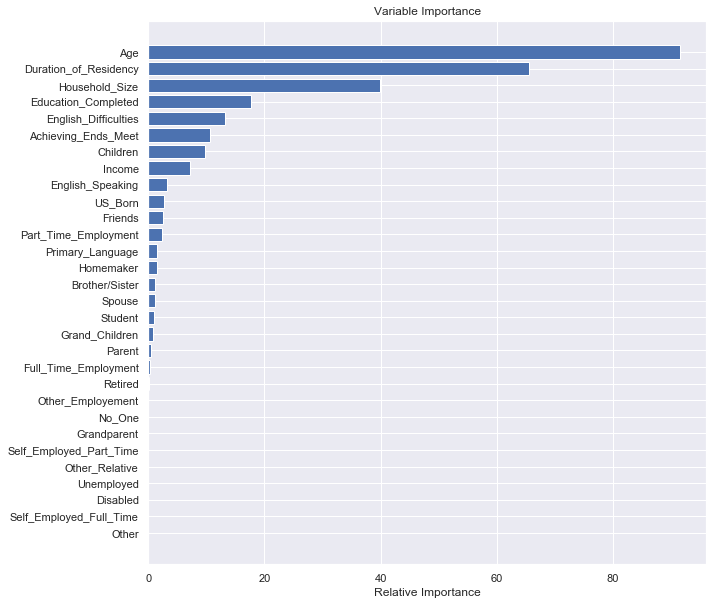

In [52]:
feature_importance = test_gb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
f1 = plt.gcf()
plt.show()
f1.savefig('Feature Importance - model 4.1.4 - trial 2- Scaled Gradient Boosting with Bayesian Optimization.png')

In [53]:
with open("RMSE and MAE of model 4.1.4 - trial 2.txt", "w") as text_file:
    print('RMSE: {} \n MAE: {} \n Model: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred),
    test_gb), file=text_file)